### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
tienda

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


# 2. Ventas por categoría

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Configuración de visualización
plt.style.use('ggplot')
pd.set_option('display.float_format', '{:,.2f}'.format)
%matplotlib inline

# 1. Carga Individual de Archivos con Validación
def cargar_archivo_individualmente(nombre_archivo):
    """Carga un archivo CSV individual con manejo de errores detallado"""
    try:
        if not os.path.exists(nombre_archivo):
            raise FileNotFoundError(f"El archivo {nombre_archivo} no existe en el directorio actual")

        df = pd.read_csv(nombre_archivo)
        print(f"✅ {nombre_archivo} cargado correctamente - Registros: {len(df):,}")
        return df
    except pd.errors.EmptyDataError:
        print(f"⚠️ {nombre_archivo} está vacío")
        return None
    except Exception as e:
        print(f"❌ Error al cargar {nombre_archivo}: {type(e).__name__} - {str(e)}")
        return None

In [ ]:
# 2. Carga Secuencial de Todos los Archivos
def cargar_archivo_individualmente(nombre_archivo):
    """Carga un archivo CSV si existe, o devuelve None si falla"""
    try:
        if os.path.exists(nombre_archivo):
            df = pd.read_csv(nombre_archivo)
            print(f"✅ Archivo '{nombre_archivo}' cargado con éxito.")
            return df
        else:
            print(f"❌ Archivo '{nombre_archivo}' no encontrado.")
            return None
    except Exception as e:
        print(f"⚠️ Error al cargar '{nombre_archivo}': {e}")
        return None

def cargar_todos_los_archivos():
    """Carga cada archivo por separado y los devuelve en un diccionario"""
    archivos = {
        'tienda_1': 'tienda_1.csv',
        'tienda_2': 'tienda_2.csv',
        'tienda_3': 'tienda_3.csv',
        'tienda_4': 'tienda_4.csv'
    }

    dataframes = {}

    for nombre, archivo in archivos.items():
        print(f"\n📂 Procesando {archivo}...")
        df = cargar_archivo_individualmente(archivo)
        if df is not None:
            # Agregar columna identificadora
            df['Origen'] = nombre.replace('_', ' ').title()
            dataframes[nombre] = df

    if not dataframes:
        raise ValueError("❌ No se pudo cargar ningún archivo válido")

    return dataframes

In [ ]:
# 3. Función para Combinar DataFrames
def combinar_dataframes(dataframes):
    """Combina múltiples DataFrames conservando el origen"""
    try:
        df_combinado = pd.concat(dataframes.values(), ignore_index=True)
        print(f"\n🔗 DataFrames combinados exitosamente - Total registros: {len(df_combinado):,}")
        return df_combinado
    except Exception as e:
        print(f"❌ Error al combinar DataFrames: {str(e)}")
        raise


In [ ]:
# 4. Proceso Principal
try:
    print("🚀 Iniciando carga de archivos...")

    # Paso 1: Carga individual
    dfs_tiendas = cargar_todos_los_archivos()

    # Paso 2: Combinación
    df_final = combinar_dataframes(dfs_tiendas)

    # Mostrar resultados
    print("\n📊 Resumen final:")
    print(f"• Total tiendas cargadas: {len(dfs_tiendas)}")
    print(f"• Total registros combinados: {len(df_final):,}")
    print(f"• Columnas disponibles: {', '.join(df_final.columns)}")

    print("\n🔍 Vista previa del DataFrame combinado:")
    display(df_final.head(3))

    # Análisis básico por tienda
    print("\n📈 Resumen por tienda:")
    display(df_final.groupby('Origen').size().to_frame('Registros'))

except Exception as e:
    print(f"\n💥 Error en el proceso principal: {str(e)}")

🚀 Iniciando carga de archivos...

📂 Procesando tienda_1.csv...
❌ Archivo 'tienda_1.csv' no encontrado.

📂 Procesando tienda_2.csv...
✅ Archivo 'tienda_2.csv' cargado con éxito.

📂 Procesando tienda_3.csv...
✅ Archivo 'tienda_3.csv' cargado con éxito.

📂 Procesando tienda_4.csv...
✅ Archivo 'tienda_4.csv' cargado con éxito.

🔗 DataFrames combinados exitosamente - Total registros: 7,076

📊 Resumen final:
• Total tiendas cargadas: 3
• Total registros combinados: 7,076
• Columnas disponibles: Producto, Categoría del Producto, Precio, Costo de envío, Fecha de Compra, Vendedor, Lugar de Compra, Calificación, Método de pago, Cantidad de cuotas, lat, lon, Origen

🔍 Vista previa del DataFrame combinado:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Origen
0,Silla de oficina,Muebles,"283,600.00","15,300.00",04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25,-75.56,Tienda 2
1,Pandereta,Instrumentos musicales,"76,800.00","2,300.00",26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25,-75.56,Tienda 2
2,Cama king,Muebles,"443,300.00","23,800.00",22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81,-75.70,Tienda 2



📈 Resumen por tienda:


,Registros
Origen,
Tienda 2,2359
Tienda 3,2359
Tienda 4,2358


In [ ]:
def verificar_columnas(df, col_categoria, col_ventas):
    """Valida que las columnas necesarias existan en el DataFrame."""
    columnas_faltantes = []

    if col_categoria not in df.columns:
        columnas_faltantes.append(col_categoria)
    if col_ventas not in df.columns:
        columnas_faltantes.append(col_ventas)

    if columnas_faltantes:
        print(f"⚠️ Columnas no encontradas: {', '.join(columnas_faltantes)}")
        print("\nColumnas disponibles:")
        print(df.columns.tolist())
        return False
    return True

# Definir nombres de columnas (¡AJUSTAR SEGÚN TUS DATOS!)
COL_CATEGORIA = 'Categoría del Producto'  # Cambiar si es necesario
COL_VENTAS = 'Precio'  # Cambiar si es necesario

# Verificar columnas
if not verificar_columnas(df, COL_CATEGORIA, COL_VENTAS):
    raise ValueError("Columnas clave no encontradas. Revisa los nombres.")

In [ ]:
def calcular_ventas_por_categoria(df, col_categoria, col_ventas):
    """Calcula métricas de ventas agrupadas por categoría."""
    try:
        ventas = df.groupby(col_categoria)[col_ventas].agg(
            ['sum', 'count', 'mean']
        ).rename(columns={
            'sum': 'Ventas Totales',
            'count': 'N° Transacciones',
            'mean': 'Ticket Promedio'
        }).sort_values('Ventas Totales', ascending=False)

        print("\n📊 RESUMEN DE VENTAS POR CATEGORÍA")
        display(ventas)
        return ventas
    except Exception as e:
        print(f"❌ Error en el cálculo: {str(e)}")
        return None

# Calcular ventas
ventas_por_categoria = calcular_ventas_por_categoria(df, COL_CATEGORIA, COL_VENTAS)
if ventas_por_categoria is None:
    raise ValueError("No se pudo calcular las ventas por categoría.")


📊 RESUMEN DE VENTAS POR CATEGORÍA


,Ventas Totales,N° Transacciones,Ticket Promedio
Categoría del Producto,,,
Electrónicos,"1,231,083,000.00",1324,"929,821.00"
Electrodomésticos,"961,065,900.00",837,"1,148,226.88"
Muebles,"570,027,300.00",1421,"401,145.18"
Instrumentos musicales,"257,473,600.00",571,"450,916.99"
Deportes y diversión,"103,687,700.00",829,"125,075.63"
Juguetes,"55,608,700.00",966,"57,565.94"
Artículos para el hogar,"44,881,400.00",559,"80,288.73"
Libros,"28,911,200.00",569,"50,810.54"


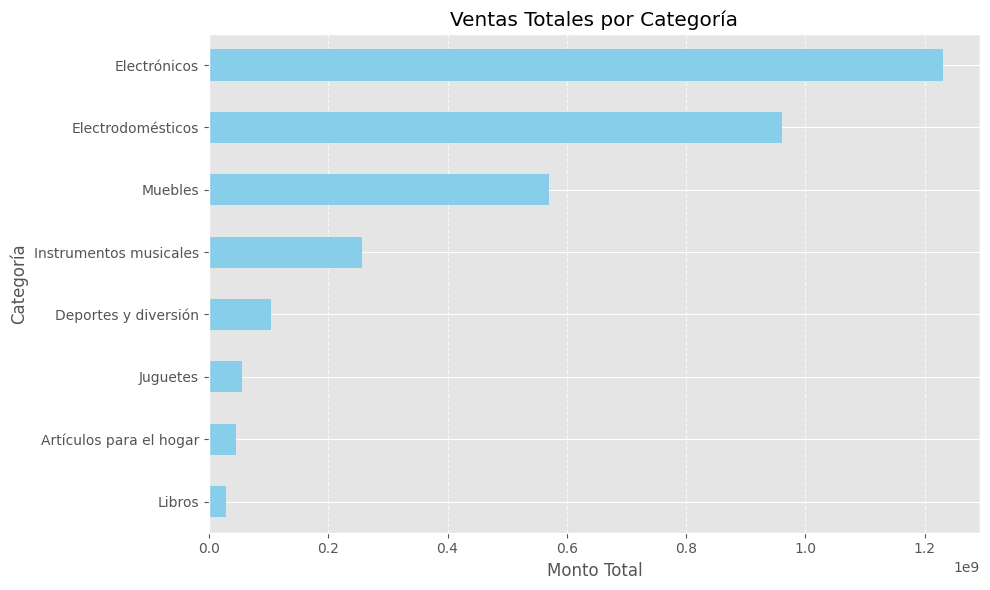

In [ ]:
def graficar_ventas(ventas_df):
    """Genera gráficos de ventas por categoría."""
    try:
        # Gráfico de barras horizontales
        plt.figure(figsize=(10, 6))
        ventas_df['Ventas Totales'].sort_values().plot(
            kind='barh',
            color='skyblue',
            title='Ventas Totales por Categoría'
        )
        plt.xlabel('Monto Total')
        plt.ylabel('Categoría')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error al generar gráficos: {str(e)}")

# Generar gráficos
graficar_ventas(ventas_por_categoria)

In [ ]:
def exportar_resultados(ventas_df, nombre_archivo='ventas_por_categoria.xlsx'):
    """Exporta los resultados a un archivo Excel."""
    try:
        ventas_df.to_excel(nombre_archivo)
        print(f"\n📁 Archivo '{nombre_archivo}' generado correctamente.")

        # Descargar en Google Colab (opcional)
        from google.colab import files
        files.download(nombre_archivo)
    except Exception as e:
        print(f"⚠️ Error al exportar: {str(e)}")

# Exportar (opcional)
exportar_resultados(ventas_por_categoria)


📁 Archivo 'ventas_por_categoria.xlsx' generado correctamente.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Calificación promedio de la tienda


🔍 Analizando calificaciones...

📊 CALIFICACIÓN PROMEDIO POR TIENDA


,Calificación Promedio,Total Evaluaciones,Desviación Estándar
Origen,,,
Tienda 3,4.05,2359,1.39
Tienda 2,4.04,2359,1.36
Tienda 4,4.00,2358,1.40


<ipython-input-60-cbd3fe93a4fd>:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


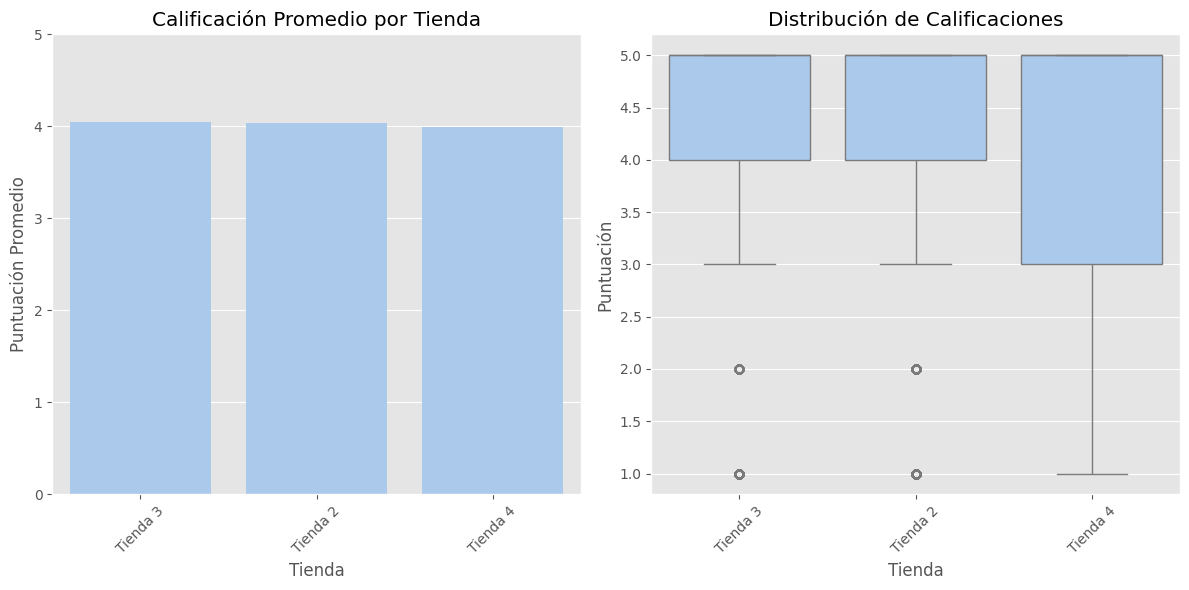

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📁 Archivo 'calificaciones_promedio.csv' descargado


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('ggplot')
sns.set_palette("pastel")
pd.set_option('display.float_format', '{:,.2f}'.format)
%matplotlib inline

def calcular_calificacion_promedio(df):
    """
    Calcula y visualiza la calificación promedio por tienda

    Args:
        df (DataFrame): DataFrame combinado con datos de todas las tiendas
                       Debe contener columnas 'Origen' y 'Calificación'
    """
    # Verificar columnas necesarias
    if 'Origen' not in df.columns or 'Calificación' not in df.columns:
        print("⚠️ Error: El DataFrame no contiene las columnas necesarias ('Origen' y 'Calificación')")
        print("Columnas disponibles:", df.columns.tolist())
        return

    try:
        # Calcular calificación promedio por tienda
        calificacion_promedio = df.groupby('Origen')['Calificación'].agg(
            ['mean', 'count', 'std']
        ).rename(columns={
            'mean': 'Calificación Promedio',
            'count': 'Total Evaluaciones',
            'std': 'Desviación Estándar'
        }).sort_values('Calificación Promedio', ascending=False)

        # Mostrar resultados
        print("\n📊 CALIFICACIÓN PROMEDIO POR TIENDA")
        display(calificacion_promedio)

        # Visualización
        plt.figure(figsize=(12, 6))

        # Gráfico de barras para calificación promedio
        plt.subplot(1, 2, 1)
        sns.barplot(
            data=df,
            x='Origen',
            y='Calificación',
            estimator='mean',
            ci=None,
            order=calificacion_promedio.index
        )
        plt.title('Calificación Promedio por Tienda')
        plt.xlabel('Tienda')
        plt.ylabel('Puntuación Promedio')
        plt.ylim(0, 5)  # Asumiendo escala de 1-5
        plt.xticks(rotation=45)

        # Gráfico de distribución
        plt.subplot(1, 2, 2)
        sns.boxplot(
            data=df,
            x='Origen',
            y='Calificación',
            order=calificacion_promedio.index
        )
        plt.title('Distribución de Calificaciones')
        plt.xlabel('Tienda')
        plt.ylabel('Puntuación')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        return calificacion_promedio

    except Exception as e:
        print(f"❌ Error al calcular calificaciones: {str(e)}")
        return None

# Uso del código (asumiendo que df_final es tu DataFrame combinado)
if 'df_final' in locals():
    print("🔍 Analizando calificaciones...")
    resultados = calcular_calificacion_promedio(df_final)

    if resultados is not None:
        # Exportar resultados (opcional)
        try:
            resultados.to_csv('calificaciones_promedio.csv')
            from google.colab import files
            files.download('calificaciones_promedio.csv')
            print("\n📁 Archivo 'calificaciones_promedio.csv' descargado")
        except Exception as e:
            print(f"⚠️ No se pudo exportar: {str(e)}")
else:
    print("ℹ️ No se encontró el DataFrame 'df_final'. Ejecuta primero el código de carga de datos.")

# 4. Productos más y menos vendidos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('ggplot')
sns.set_palette("pastel")
pd.set_option('display.float_format', '{:,.2f}'.format)
%matplotlib inline

def verificar_columnas_productos(df):
    """Verifica las columnas necesarias para el análisis de productos"""
    columnas_requeridas = ['Producto', 'Cantidad']  # Ajustar según tus datos
    faltantes = [col for col in columnas_requeridas if col not in df.columns]

    if faltantes:
        print(f"❌ Columnas faltantes: {', '.join(faltantes)}")
        print("Columnas disponibles:", df.columns.tolist())
        return False
    return True

In [ ]:
def analizar_ventas_productos(df, top_n=5):
    """
    Identifica los productos más y menos vendidos
    Args:
        df: DataFrame con datos de ventas
        top_n: Número de productos a mostrar en cada categoría
    """
    if not verificar_columnas_productos(df):
        return None

    try:
        # Agrupar por producto y sumar cantidades
        ventas_por_producto = df.groupby('Producto')['Cantidad'].agg(
            ['sum', 'count']
        ).rename(columns={
            'sum': 'Total_Vendido',
            'count': 'Veces_Vendido'
        }).sort_values('Total_Vendido', ascending=False)

        # Productos más vendidos
        top_productos = ventas_por_producto.head(top_n)

        # Productos menos vendidos (excluyendo no vendidos)
        productos_con_ventas = ventas_por_producto[ventas_por_producto['Total_Vendido'] > 0]
        bottom_productos = productos_con_ventas.tail(top_n)

        return {
            'top_productos': top_productos,
            'bottom_productos': bottom_productos,
            'resumen': ventas_por_producto.describe()
        }

    except Exception as e:
        print(f"❌ Error en análisis: {str(e)}")
        return None

In [ ]:
def visualizar_ventas_productos(resultados, top_n=5):
    """Genera gráficos para los productos más/menos vendidos"""
    if not resultados:
        return

    plt.figure(figsize=(15, 6))

    # Gráfico productos más vendidos
    plt.subplot(1, 2, 1)
    sns.barplot(
        x='Total_Vendido',
        y=resultados['top_productos'].index,
        data=resultados['top_productos'],
        palette='Greens_d'
    )
    plt.title(f'Top {top_n} Productos Más Vendidos')
    plt.xlabel('Cantidad Total Vendida')
    plt.ylabel('Producto')

    # Gráfico productos menos vendidos
    plt.subplot(1, 2, 2)
    sns.barplot(
        x='Total_Vendido',
        y=resultados['bottom_productos'].index,
        data=resultados['bottom_productos'],
        palette='Reds_d'
    )
    plt.title(f'Top {top_n} Productos Menos Vendidos')
    plt.xlabel('Cantidad Total Vendida')
    plt.ylabel('Producto')

    plt.tight_layout()
    plt.show()

In [ ]:
def exportar_analisis_productos(resultados, formato='excel'):
    """Exporta los resultados a diferentes formatos"""
    try:
        if formato == 'excel':
            with pd.ExcelWriter('analisis_productos.xlsx') as writer:
                resultados['top_productos'].to_excel(writer, sheet_name='Top Productos')
                resultados['bottom_productos'].to_excel(writer, sheet_name='Bottom Productos')
                resultados['resumen'].to_excel(writer, sheet_name='Resumen Estadistico')
            print("✅ Archivo Excel 'analisis_productos.xlsx' generado")
        elif formato == 'csv':
            resultados['top_productos'].to_csv('top_productos.csv')
            resultados['bottom_productos'].to_csv('bottom_productos.csv')
            print("✅ Archivos CSV generados: 'top_productos.csv' y 'bottom_productos.csv'")
        else:
            print("⚠️ Formato no soportado. Use 'excel' o 'csv'")
    except Exception as e:
        print(f"❌ Error al exportar: {str(e)}")

In [ ]:
def analizar_productos(df, top_n=5, exportar=True):
    """Función principal para el análisis de productos"""
    print("🔍 Analizando ventas por producto...")

    resultados = analizar_ventas_productos(df, top_n)

    if not resultados:
        return None

    print("\n📊 Productos más vendidos:")
    display(resultados['top_productos'])

    print("\n📉 Productos menos vendidos:")
    display(resultados['bottom_productos'])

    print("\n📝 Resumen estadístico:")
    display(resultados['resumen'])

    print("\n📈 Generando visualizaciones...")
    visualizar_ventas_productos(resultados, top_n)

    if exportar:
        exportar_analisis_productos(resultados)

    return resultados

🔍 Analizando ventas por producto...

📊 Productos más vendidos:


,Total_Vendido,Veces_Vendido
Producto,,
Pandereta,161,161
Set de ollas,157,157
Cama king,157,157
Cama box,155,155
Iniciando en programación,154,154
Mesa de noche,154,154
Carrito de control remoto,154,154



📉 Productos menos vendidos:


,Total_Vendido,Veces_Vendido
Producto,,
TV LED UHD 4K,127,127
Ciencia de datos con Python,127,127
Auriculares con micrófono,125,125
Celular ABXY,124,124
Auriculares,124,124
Mochila,124,124
Guitarra eléctrica,118,118



📝 Resumen estadístico:


,Total_Vendido,Veces_Vendido
count,51.00,51.00
mean,138.75,138.75
std,10.23,10.23
min,118.00,118.00
25%,131.00,131.00
50%,137.00,137.00
75%,145.50,145.50
max,161.00,161.00



📈 Generando visualizaciones...


<ipython-input-63-8a0b907f4713>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-63-8a0b907f4713>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


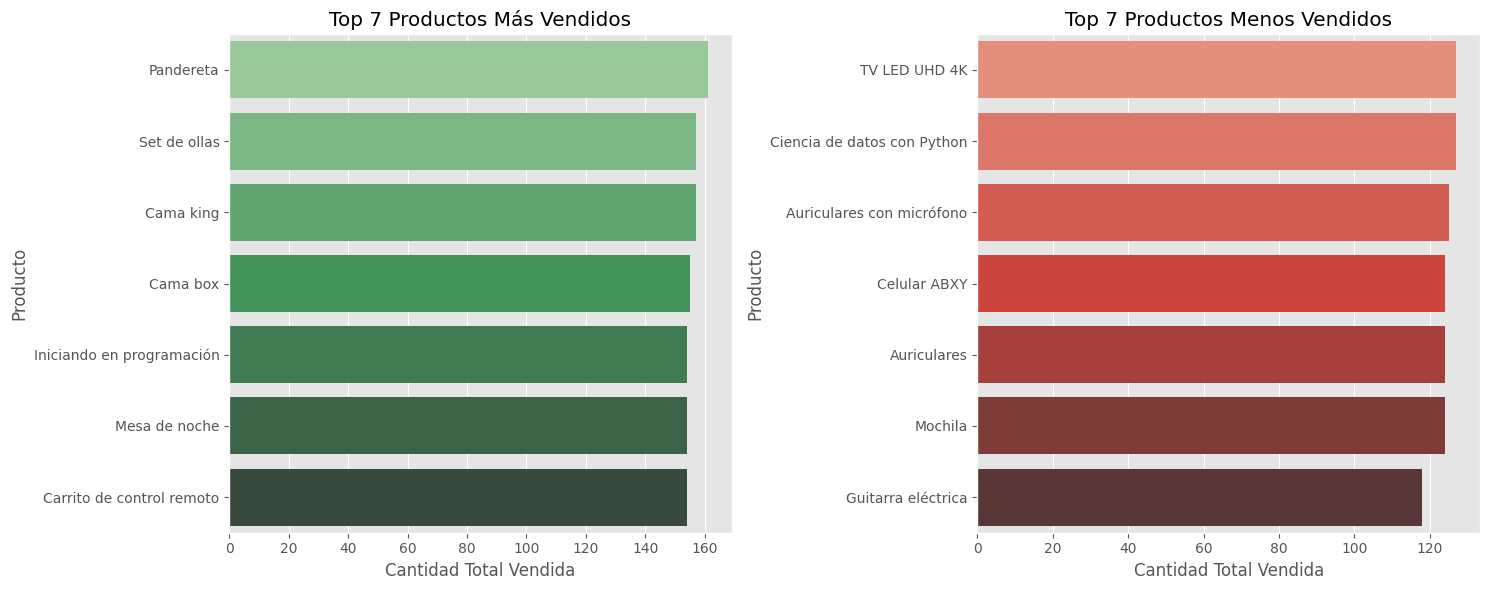

✅ Archivo Excel 'analisis_productos.xlsx' generado


In [ ]:
if 'df_final' in locals():
    # Cambiar 'Cantidad' por tu columna real de unidades vendidas
    df_final['Cantidad'] = 1  # Si no tienes columna de cantidad, cada registro = 1 unidad
    resultados_productos = analizar_productos(df_final, top_n=7)
else:
    print("ℹ️ No se encontró el DataFrame 'df_final'")

# 5. Envío promedio por tienda

In [ ]:
import pandas as pd
import os
from google.colab import files

# 🔧 Función para cargar un solo archivo
def cargar_archivo_individualmente(nombre_archivo):
    """Carga un archivo CSV si existe, o devuelve None si falla"""
    try:
        if os.path.exists(nombre_archivo):
            df = pd.read_csv(nombre_archivo)
            print(f"✅ Archivo '{nombre_archivo}' cargado con éxito.")
            return df
        else:
            print(f"❌ Archivo '{nombre_archivo}' no encontrado.")
            return None
    except Exception as e:
        print(f"⚠️ Error al cargar '{nombre_archivo}': {e}")
        return None

# 📂 Función para cargar todos los archivos
def cargar_todos_los_archivos():
    """Carga cada archivo por separado y los devuelve en un diccionario"""
    archivos = {
        'tienda_1': 'tienda_1.csv',
        'tienda_2': 'tienda_2.csv',
        'tienda_3': 'tienda_3.csv',
        'tienda_4': 'tienda_4.csv'
    }

    dataframes = {}

    for nombre, archivo in archivos.items():
        print(f"\n📂 Procesando {archivo}...")
        df = cargar_archivo_individualmente(archivo)
        if df is not None:
            df['Tienda'] = nombre.replace('_', ' ').title()  # Agrega columna 'Tienda'
            dataframes[nombre] = df

    if not dataframes:
        raise ValueError("❌ No se pudo cargar ningún archivo válido")

    return dataframes

# 🚀 Inicio de proceso
print("📦 Iniciando análisis de costos de envío...")

# Cargar todos los DataFrames
dataframes_dict = cargar_todos_los_archivos()

# Combinar los DataFrames en uno solo
df_combinado = pd.concat(dataframes_dict.values(), ignore_index=True)

# 📊 Resumen final
print(f"\n🔗 DataFrames combinados exitosamente - Total registros: {len(df_combinado):,}")

print("\n📊 Resumen final:")
print(f"• Total tiendas cargadas: {len(dataframes_dict)}")
print(f"• Total registros combinados: {len(df_combinado):,}")
print(f"• Columnas disponibles: {', '.join(df_combinado.columns)}")

# 🔍 Vista previa del DataFrame combinado
print("\n🔍 Vista previa del DataFrame combinado:")
display(df_combinado.head())


📦 Iniciando análisis de costos de envío...

📂 Procesando tienda_1.csv...
❌ Archivo 'tienda_1.csv' no encontrado.

📂 Procesando tienda_2.csv...
✅ Archivo 'tienda_2.csv' cargado con éxito.

📂 Procesando tienda_3.csv...
✅ Archivo 'tienda_3.csv' cargado con éxito.

📂 Procesando tienda_4.csv...
✅ Archivo 'tienda_4.csv' cargado con éxito.

🔗 DataFrames combinados exitosamente - Total registros: 7,076

📊 Resumen final:
• Total tiendas cargadas: 3
• Total registros combinados: 7,076
• Columnas disponibles: Producto, Categoría del Producto, Precio, Costo de envío, Fecha de Compra, Vendedor, Lugar de Compra, Calificación, Método de pago, Cantidad de cuotas, lat, lon, Tienda

🔍 Vista previa del DataFrame combinado:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Silla de oficina,Muebles,"283,600.00","15,300.00",04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25,-75.56,Tienda 2
1,Pandereta,Instrumentos musicales,"76,800.00","2,300.00",26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25,-75.56,Tienda 2
2,Cama king,Muebles,"443,300.00","23,800.00",22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81,-75.70,Tienda 2
3,Cama king,Muebles,"906,200.00","46,400.00",04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.44,-76.52,Tienda 2
4,Silla de oficina,Muebles,"397,800.00","19,400.00",26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.61,-74.08,Tienda 2


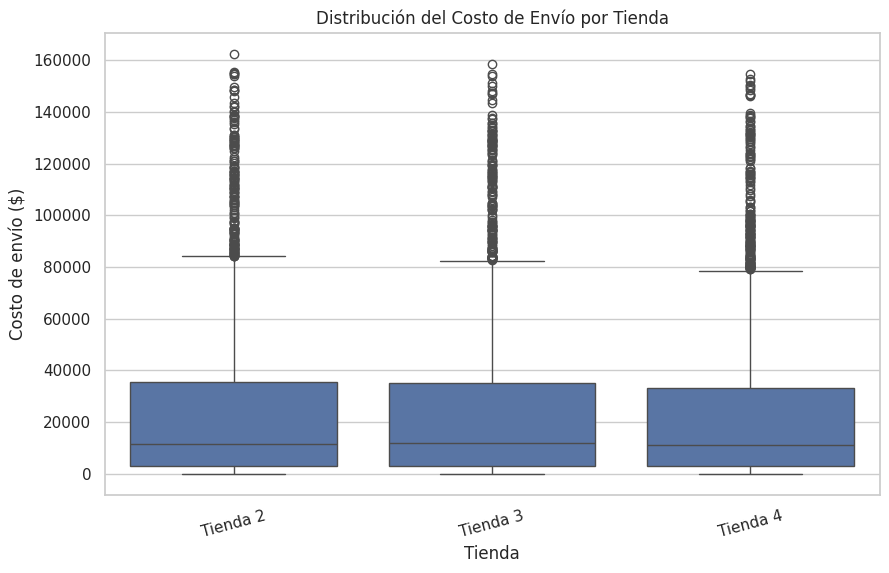

<ipython-input-77-699b57c0c951>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_promedio.index, y=precio_promedio.values, palette="viridis")


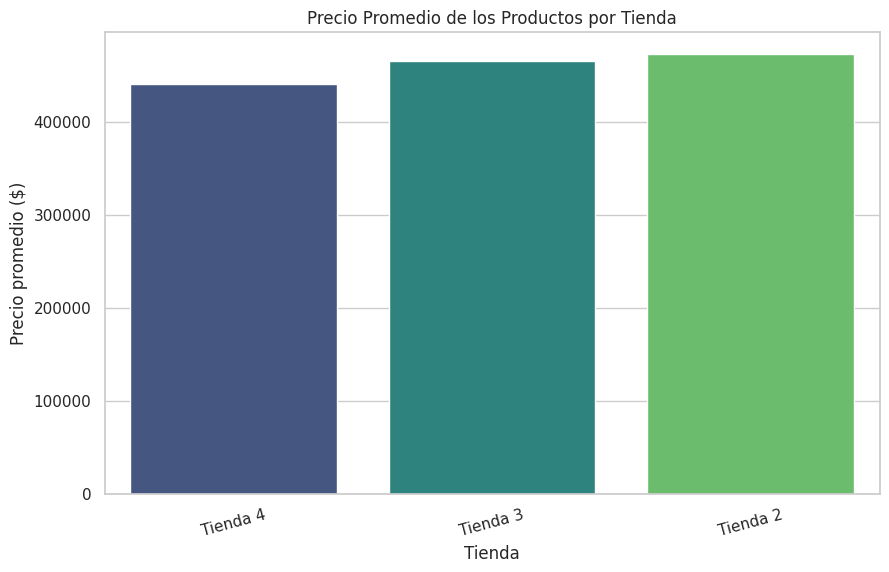

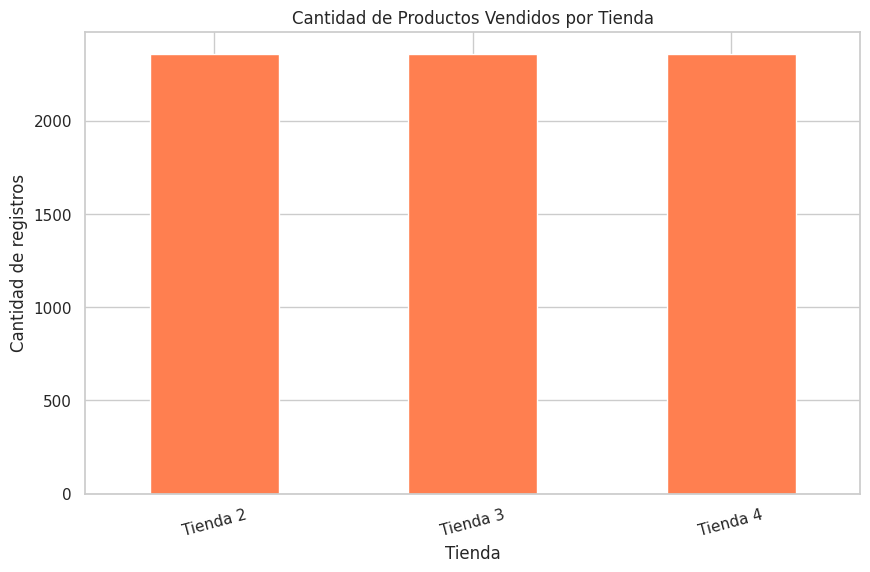

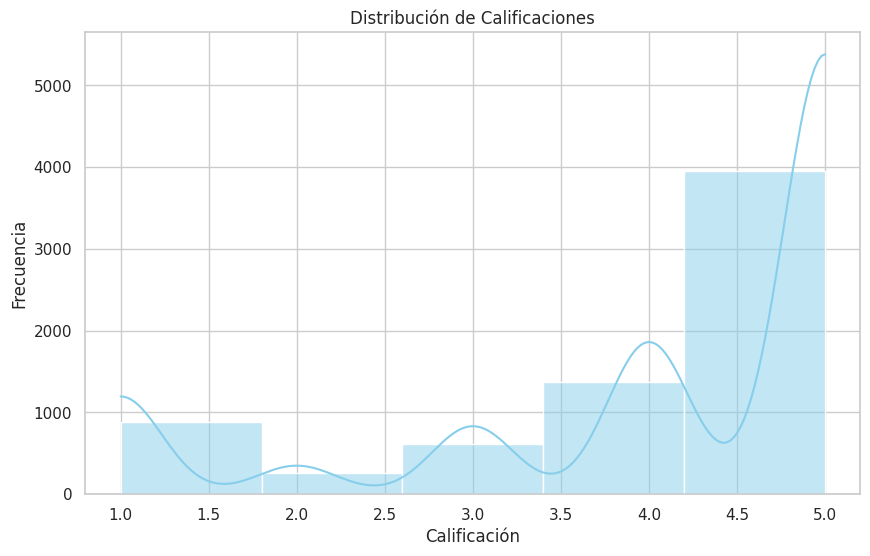

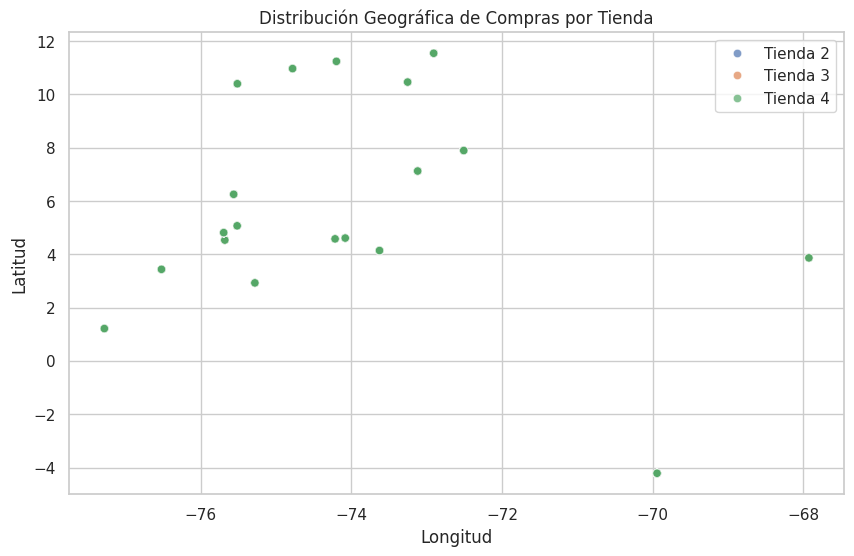

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. 📈 Distribución del costo de envío por tienda
plt.figure()
sns.boxplot(data=df_combinado, x='Tienda', y='Costo de envío')
plt.title('Distribución del Costo de Envío por Tienda')
plt.ylabel('Costo de envío ($)')
plt.xlabel('Tienda')
plt.xticks(rotation=15)
plt.show()

# 2. 💸 Precio promedio de los productos por tienda
precio_promedio = df_combinado.groupby('Tienda')['Precio'].mean().sort_values()
plt.figure()
sns.barplot(x=precio_promedio.index, y=precio_promedio.values, palette="viridis")
plt.title('Precio Promedio de los Productos por Tienda')
plt.ylabel('Precio promedio ($)')
plt.xlabel('Tienda')
plt.xticks(rotation=15)
plt.show()

# 3. 📦 Cantidad de productos vendidos por tienda
plt.figure()
df_combinado['Tienda'].value_counts().plot(kind='bar', color='coral')
plt.title('Cantidad de Productos Vendidos por Tienda')
plt.ylabel('Cantidad de registros')
plt.xlabel('Tienda')
plt.xticks(rotation=15)
plt.show()

# 4. ⭐ Distribución de calificaciones
plt.figure()
sns.histplot(data=df_combinado, x='Calificación', bins=5, kde=True, color='skyblue')
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

# 5. 📍 Mapa simple de ubicaciones (lat, lon)
plt.figure()
sns.scatterplot(data=df_combinado, x='lon', y='lat', hue='Tienda', alpha=0.7)
plt.title('Distribución Geográfica de Compras por Tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(loc='best')
plt.show()
